实验报告

In [1]:
import pdfplumber
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
def pdf2txt(pdf_file):
    text = ''
    with pdfplumber.open(pdf_file) as pdf:
        for page in pdf.pages:
            text_in_page = page.extract_text()
            if text_in_page != None:
                text = text + text_in_page
    txt_file = pdf_file[0:-4]+'.txt'
    f_txt = open(txt_file, 'w', encoding='utf-8')
    f_txt.write(text)
    f_txt.close()
    return()

def txt2ram(txt_file):
    f = open(txt_file, 'r', encoding='utf-8')
    text = f.read()
    f.close()
    return(text)

由于pdf过大，所以定义函数，把每个pdf相应转成text，方便后面运行

In [3]:
path = "C:\\Users\\Lenovo\\.spyder-py3\\2019(1)"
ndbbpdf = os.listdir( path ) # ndbb:年度报表
for item in ndbbpdf:
    path = 'C:\\Users\\Lenovo\\.spyder-py3\\2019(1)\\'+item
    pdf2txt(path)
path = "C:\\Users\\Lenovo\\.spyder-py3\\2019(1)"    
ndbbwj = os.listdir( path )# ndbbwj:年度报表文件


pdf_files = []
for f in ndbbwj:
    if f[-4:] == '.pdf':
        pdf_files.append(f)
txt_files = []
for f in ndbbwj:
    if f[-4:] == '.txt':
        txt_files.append(f)

将文件夹中pdf的名字组成一个list，txt的名族组成一个list

In [4]:
GPJC=[]
GPDM=[]
FDDBR=[]
BGDZ=[]
WZ=[]
YX=[]
SJ2019=[]
SJ2018=[]
SJ2017=[]


for item in txt_files:
    path = 'C:\\Users\\Lenovo\\.spyder-py3\\2019(1)\\'+item
    f = open(path, 'r', encoding='utf-8')
    text = f.read()
    start_index1 = text.find('一、公司信息')
    end_index1 = text.find('二、联系人和联系方式')     
    kjsj_cwzb1 = text[start_index1:end_index1]
    start_index2 = text.find('五、主要会计数据和财务指标')
    end_index2 = text.find('六、分季度主要财务指标')
    kjsj_cwzb2 = text[start_index2:end_index2]

    a = kjsj_cwzb1.find('股票简称')
    b = kjsj_cwzb1.find('公司的中文名称')
    c = kjsj_cwzb1.find('公司的法定代表人')
    d = kjsj_cwzb1.find('注册地址')
    e = kjsj_cwzb1.find('办公地址')
    f = kjsj_cwzb1.find('办公地址的邮政编码')
    g = kjsj_cwzb1.find('公司国际互联网网址')
    h = kjsj_cwzb1.find('二、联系人和联系方式')
    s = kjsj_cwzb2.find('经营活动产生的现金流量净') 
    t = kjsj_cwzb2.find('基本每股收益（元/股）') 
    yysr1 = kjsj_cwzb1[a:b]+kjsj_cwzb1[c:d]+kjsj_cwzb1[e:f]+kjsj_cwzb1[g:h]
    yysr2 = kjsj_cwzb2[s:t]
    yysr = yysr1+yysr2
    yysr = yysr.replace('\n',' ')
    words = yysr.split(' ')
    answer = [i for i in words if i != '']

    GPJC.append(answer[1])
    GPDM.append(answer[3])
    FDDBR.append(answer[5])
    BGDZ.append(answer[7])
    WZ.append(answer[9])
    YX.append(answer[11])
    SJ2019.append(answer[13])
    SJ2018.append(answer[14])
    SJ2017.append(answer[16])  
      
df1 = pd.DataFrame({'股票简称':GPJC,
                 '股票代码':GPDM,
                 '公司的法定代表人':FDDBR,
                 '办公地址':BGDZ,
                 '公司国际互联网网址':WZ,
                 '公司邮箱':YX,
                 '2019年经营活动产生的现金流量净额（元）':SJ2019,
                 '2018年经营活动产生的现金流量净额（元）':SJ2018,
                 '2017年经营活动产生的现金流量净额（元）':SJ2017})        
print('df1：')
display(df1)

df1：


股票简称    股票代码 公司的法定代表人                                 办公地址  \
0   恒信东方  300081      孟宪民                北京市海淀区蓝靛厂南路牛顿办公区北区11层   
1   华中数控  300161      陈吉红                        武汉市东湖开发区华工科技园   
2   大烨智能  300670       陈杰                       南京市江宁区将军大道223号   
3   富满电子  300671      刘景裕            深圳市福田区香蜜湖街道农园路时代科技大厦西区18楼   
4   中科信息  300678      史志明                       四川省成都市人民南路四段9号   
5    一品红  300723      李捍雄         广州市天河区珠江新城金穗路星汇国际大厦西塔17层01单元   
6   华致酒行  300755      彭宇清             北京市东城区白桥大街15号嘉禾国信大厦CD座5层   
7   新媒股份  300770      林瑞军                   广州市人民北路686号自编25幢后座   
8   三角防务  300775      严建亚                        西安市航空基地蓝天二路8号   
9   唐源电气  300789       周艳             成都市武侯区武兴五路355号西部智谷A1-1-9   
10  壹网壹创  300792      林振宇  浙江省杭州市经济技术开发区白杨街道科技园路2号2幢14层01-14单元   

                       公司国际互联网网址                      公司邮箱  \
0          http://www.hxgro.com/          office@hxgro.com   
1            www.huazhongcnc.com            hcnc@hzncc.com   
2        http://www.daybright.cn          tzzgx@dayedq.com   
3       http://www.superchip.cn/          zqb@superchip.cn   
4        http://www.casit.com.cn          dsh@casit.com.cn   
5                  www.gdyph.com             zqb@gdyph.com   
6             www.vatsliquor.com  dongmiban@vatsliquor.com   
7           http://www.snm.gd.cn    newmedia_db1@gdsnm.net   
8           http://www.400mn.com            sjfw@400mn.com   
9           http://www.cdtye.com         dongban@cdtye.com   
10  http：//www.topwinchance.com/     onechance@dajiaok.com   

   2019年经营活动产生的现金流量净额（元） 2018年经营活动产生的现金流量净额（元） 2017年经营活动产生的现金流量净额（元）  
0        -128,602,623.54          4,015,174.12        -83,277,810.06  
1          -7,706,529.47        133,781,403.75       -156,320,029.48  
2          58,637,597.34        -21,727,473.23          8,028,434.82  
3         -36,600,504.30          2,950,356.13        -18,477,538.53  
4          -4,971,602.19        -12,732,925.39         12,052,326.74  
5         280,649,860.14        238,599,800.41        158,419,971.36  
6         108,155,641.70       -241,264,509.24        365,095,328.30  
7         462,252,958.42        246,383,200.85        198,515,802.74  
8         139,241,156.48         79,913,484.64        173,241,618.13  
9        -124,668,123.84         50,929,880.80          5,842,787.60  
10        146,902,204.57        104,873,277.23         78,848,853.93

如图所示，接下来，利用后三列作图

df2：


2019年         2018年         2017年
股票代码                                            
300081 -1.286026e+08  4.015174e+06 -8.327781e+07
300161 -7.706529e+06  1.337814e+08 -1.563200e+08
300670  5.863760e+07 -2.172747e+07  8.028435e+06
300671 -3.660050e+07  2.950356e+06 -1.847754e+07
300678 -4.971602e+06 -1.273293e+07  1.205233e+07
300723  2.806499e+08  2.385998e+08  1.584200e+08
300755  1.081556e+08 -2.412645e+08  3.650953e+08
300770  4.622530e+08  2.463832e+08  1.985158e+08
300775  1.392412e+08  7.991348e+07  1.732416e+08
300789 -1.246681e+08  5.092988e+07  5.842788e+06
300792  1.469022e+08  1.048733e+08  7.884885e+07

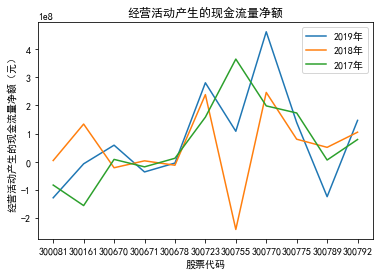

In [5]:
SJJ2019=[]
SJJ2018=[]
SJJ2017=[]
y1=df1['2019年经营活动产生的现金流量净额（元）'].values.tolist()
y2=df1['2018年经营活动产生的现金流量净额（元）'].values.tolist()
y3=df1['2017年经营活动产生的现金流量净额（元）'].values.tolist()
for i in y1:
    a = i.replace(',','')
    a=float(a)
    SJJ2019.append(a)
for i in y2:
    a = i.replace(',','')
    a=float(a)
    SJJ2018.append(a)
for i in y3:
    a = i.replace(',','')
    a=float(a)
    SJJ2017.append(a)    
df2 = pd.DataFrame({'2019年':SJJ2019,
                 '2018年':SJJ2018,
                 '2017年':SJJ2017},index=df1['股票代码'],columns=['2019年','2018年','2017年'])
print('df2：')
display(df2)
df2.plot(title='经营活动产生的现金流量净额')
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.xticks(range(11), df1['股票代码'])
plt.xlabel('股票代码')
plt.ylabel("经营活动产生的现金流量净额（元）")
plt.legend()
plt.show()

如图所示，将df1后三列数字由字符串转成float之后，新建df2（索引为股票代码），画图，可以看出每个公司具体这三年来经营活动产生的现金流量净额的变化，以及公司之间的对比